Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Importing the dataset

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

Exploring the dataset

In [3]:
data.shape

(8425, 23)

In [4]:
data.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Imputing the missing values

In [8]:
temperature_columns = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

for column in temperature_columns:
    data[column].fillna(data[column].mean(), inplace=True)

In [9]:
outlier_columns = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                             'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                             'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                             'Cloud9am', 'Cloud3pm']

for i in outlier_columns:
    data[i].fillna(data[i].median(), inplace=True)

In [10]:
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday','RainTomorrow']

for i in categorical_columns:
    data[i].fillna(data[i].mode().iloc[0], inplace=True)

In [11]:
data.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    23.859976     2.725982     5.060332     8.138409   
std       5.379488     6.114516    10.319872     3.871619     2.875324   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     8.400000   
50%      13.200000    23.300000     0.000000     4.600000     8.700000   
75%      17.300000    28.000000     0.800000     5.200000     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.036320     13.840000     18.539585    67.823739    51.246766   
std        13.781296     10.128896      9.704899    16.774237    18.311914   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.649519  1015.246030     4.691157     4.647953    17.762015   
std       6.275796     6.217494     2.437110     2.310476     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8425.000000  
mean     22.442934  
std       5.945849  
min       7.300000  
25%      18.100000  
50%      22.000000  
75%      26.300000  
max      44.100000

In [12]:
data.isnull().sum() #checking for missing values

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Data Visualization

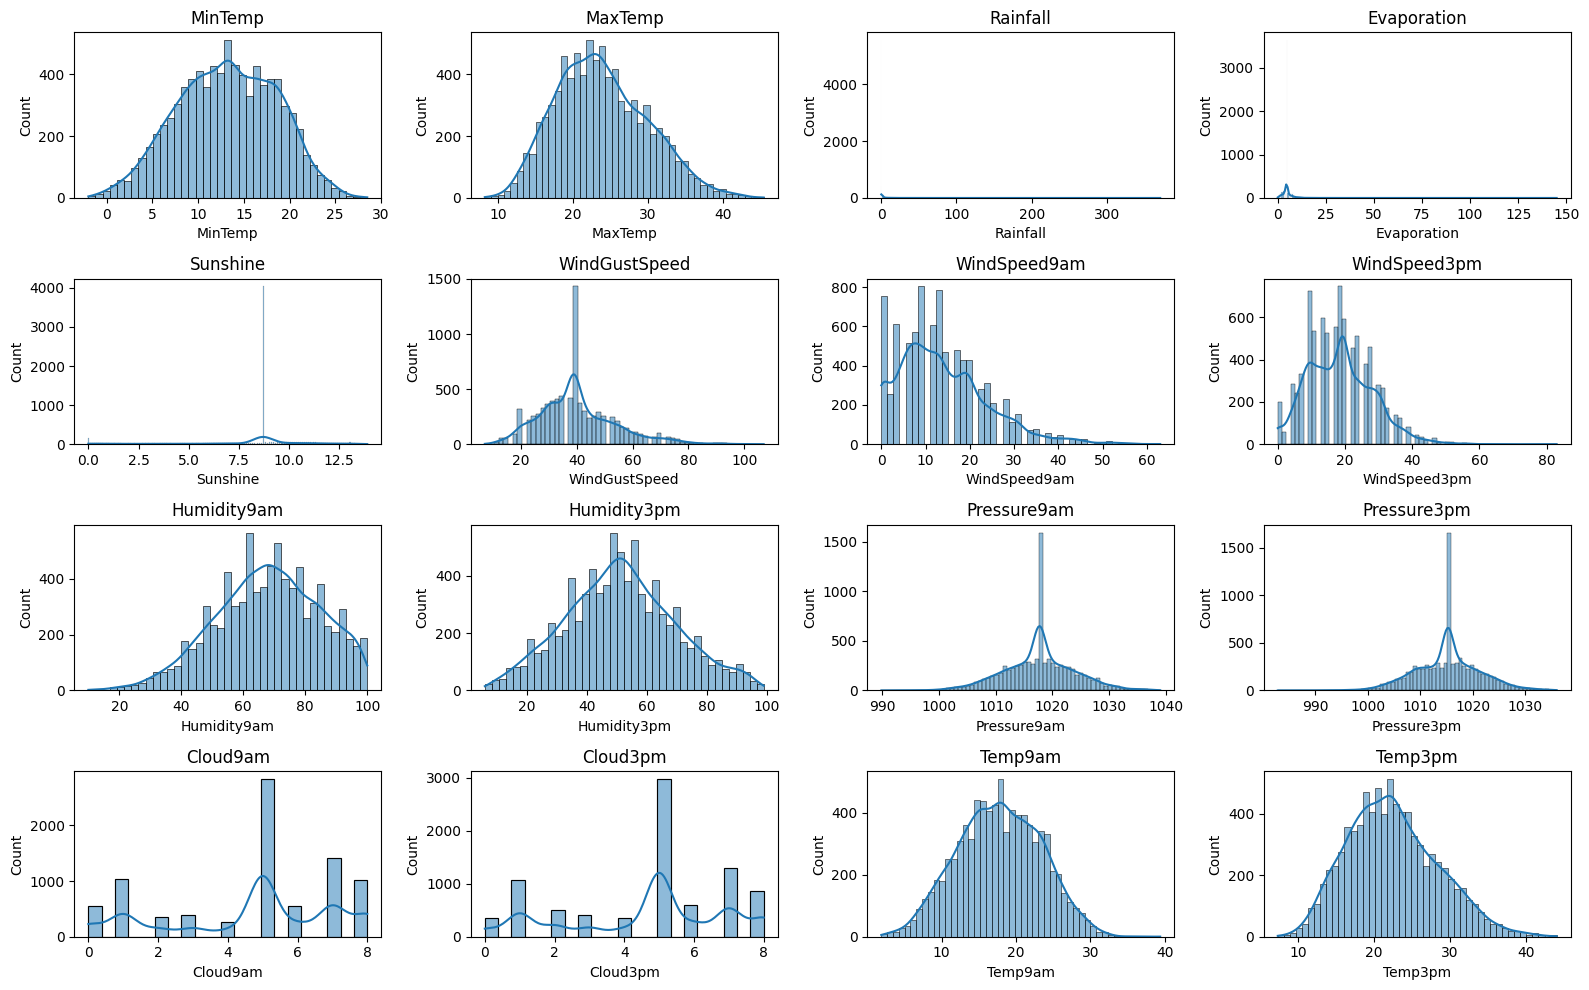

In [13]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sb.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

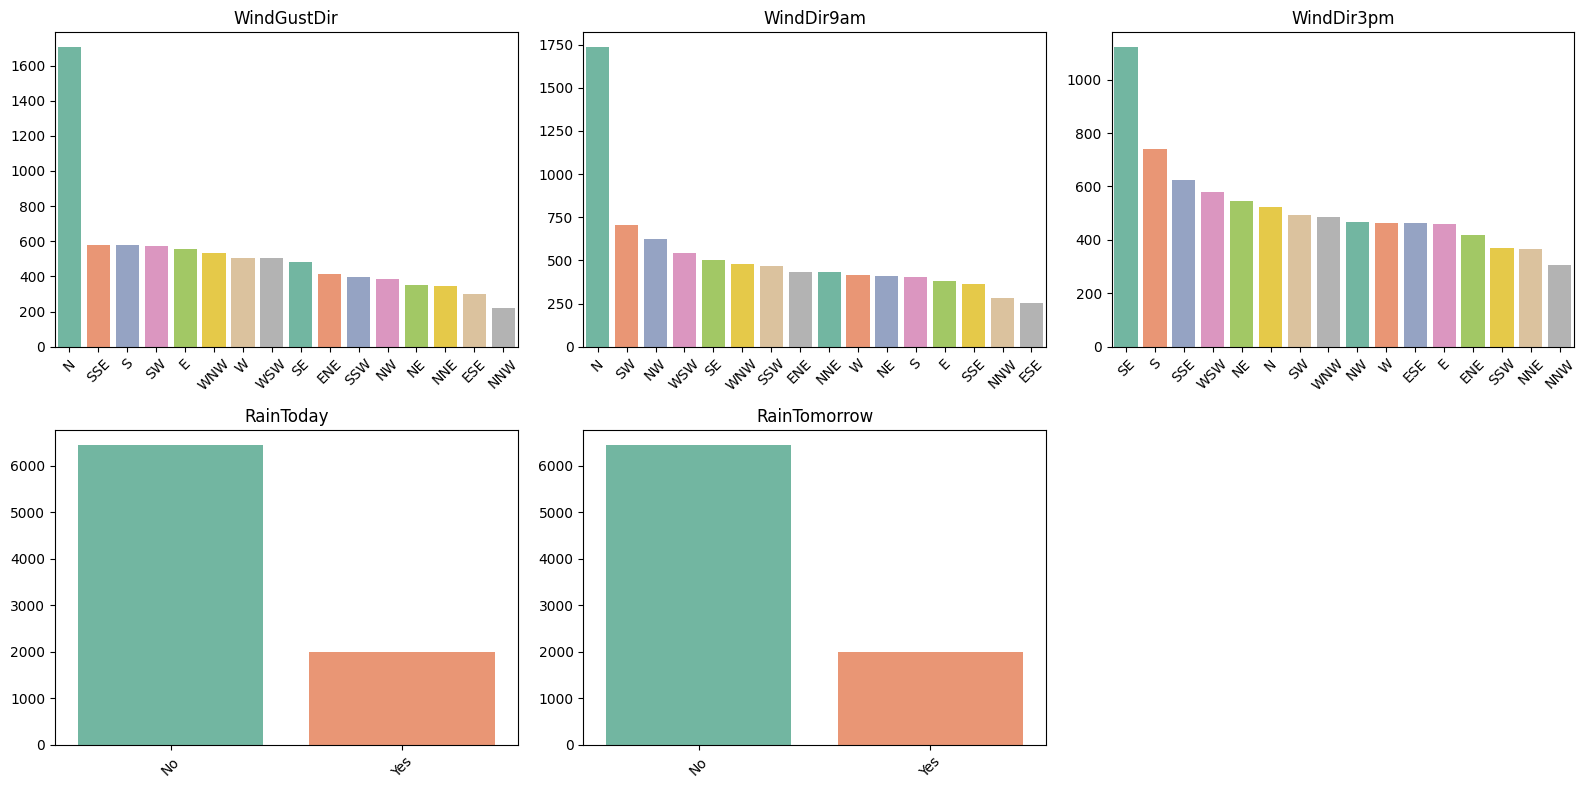

In [14]:
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

plt.figure(figsize=(16, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    value_counts = data[col].value_counts()
    sb.barplot(x=value_counts.index, y=value_counts.values, palette='Set2')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

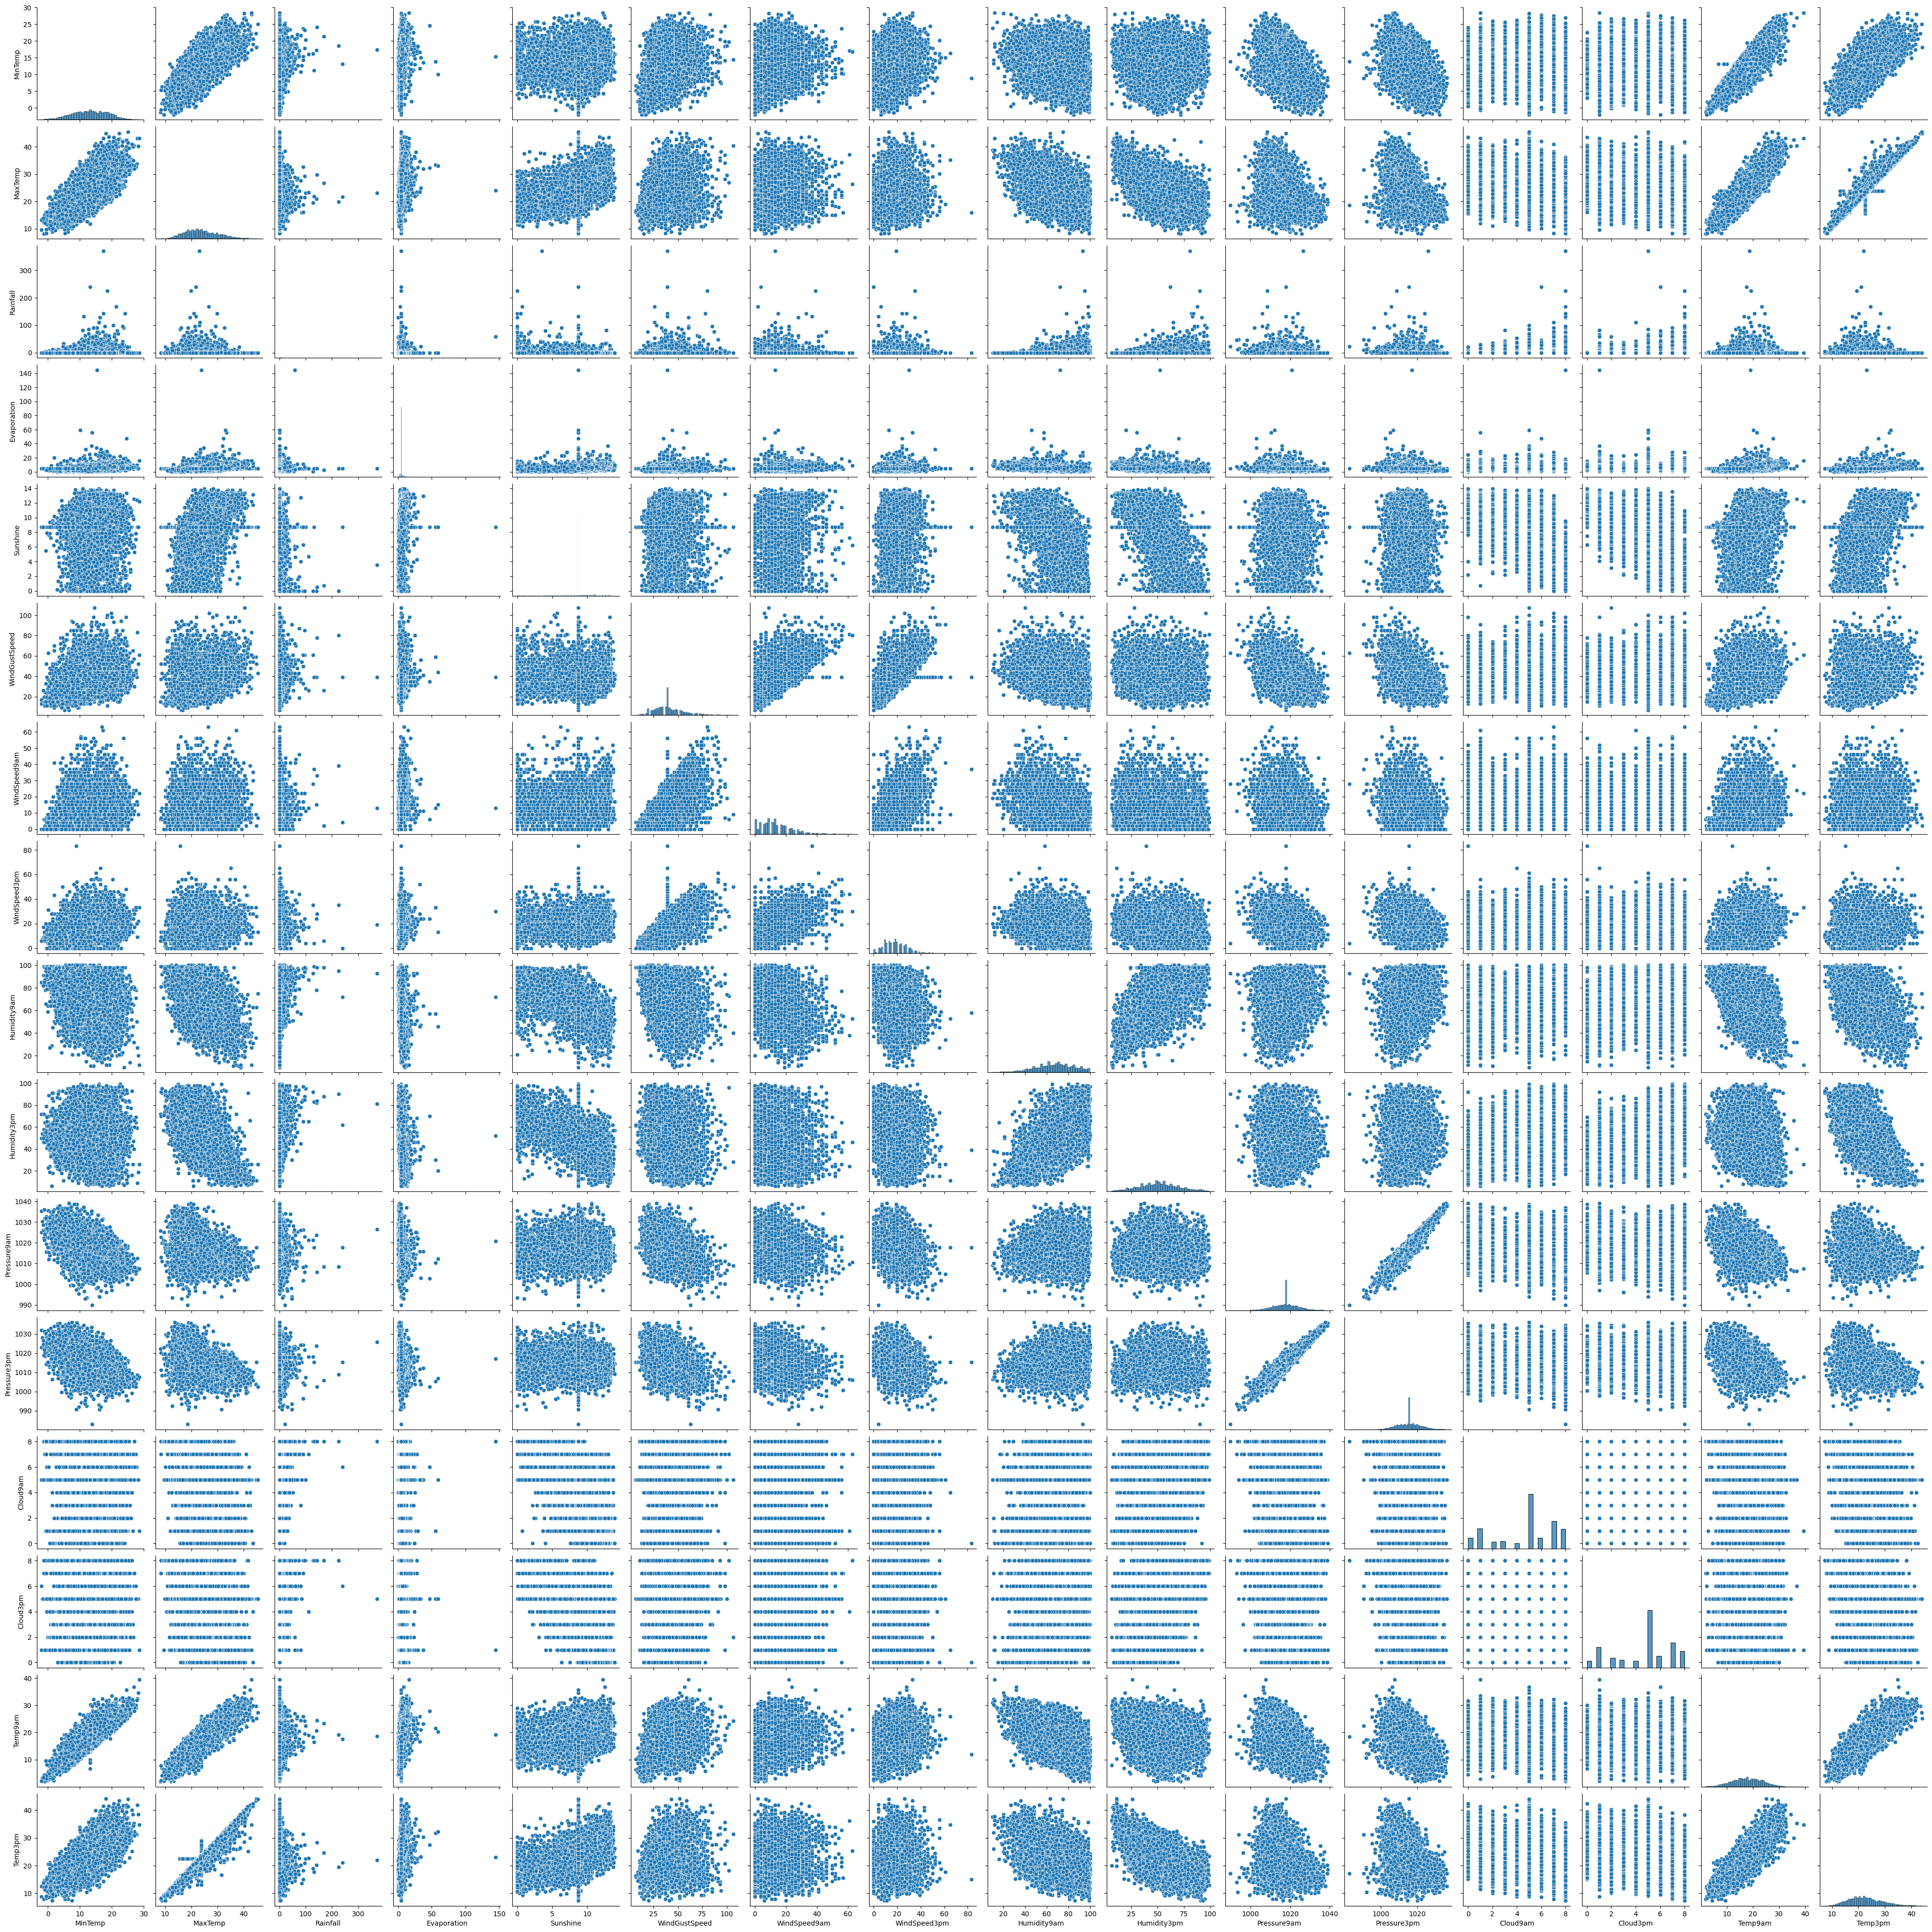

In [15]:
sb.pairplot(data[numerical_columns])
plt.show()

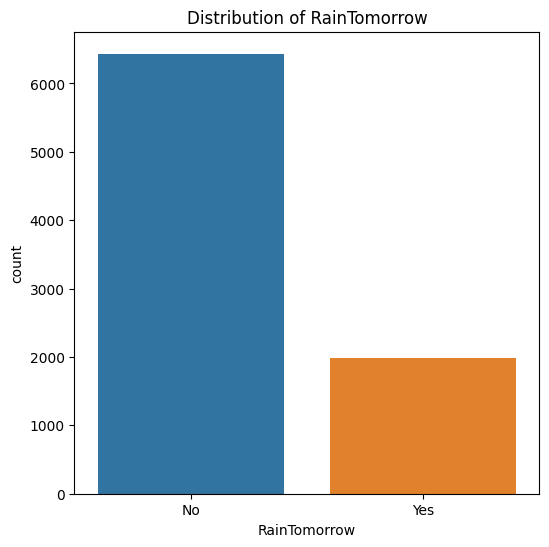

In [16]:
plt.figure(figsize=(6, 6))
sb.countplot(x= 'RainTomorrow', data=data)
plt.title('Distribution of RainTomorrow')
plt.show()

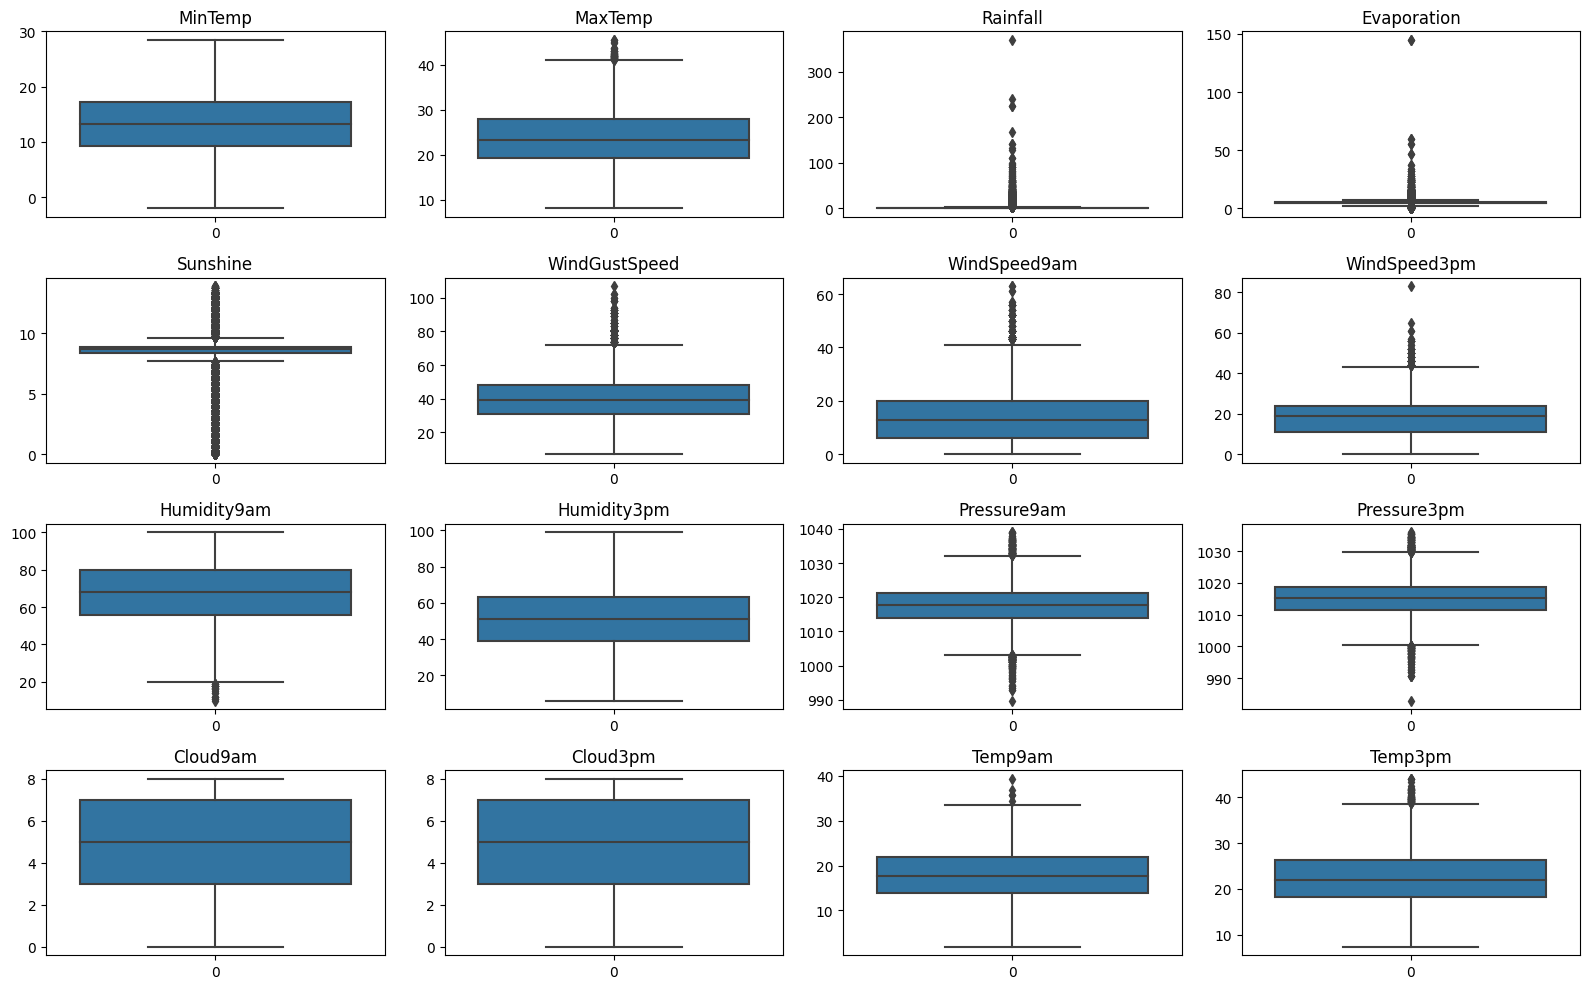

In [17]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sb.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

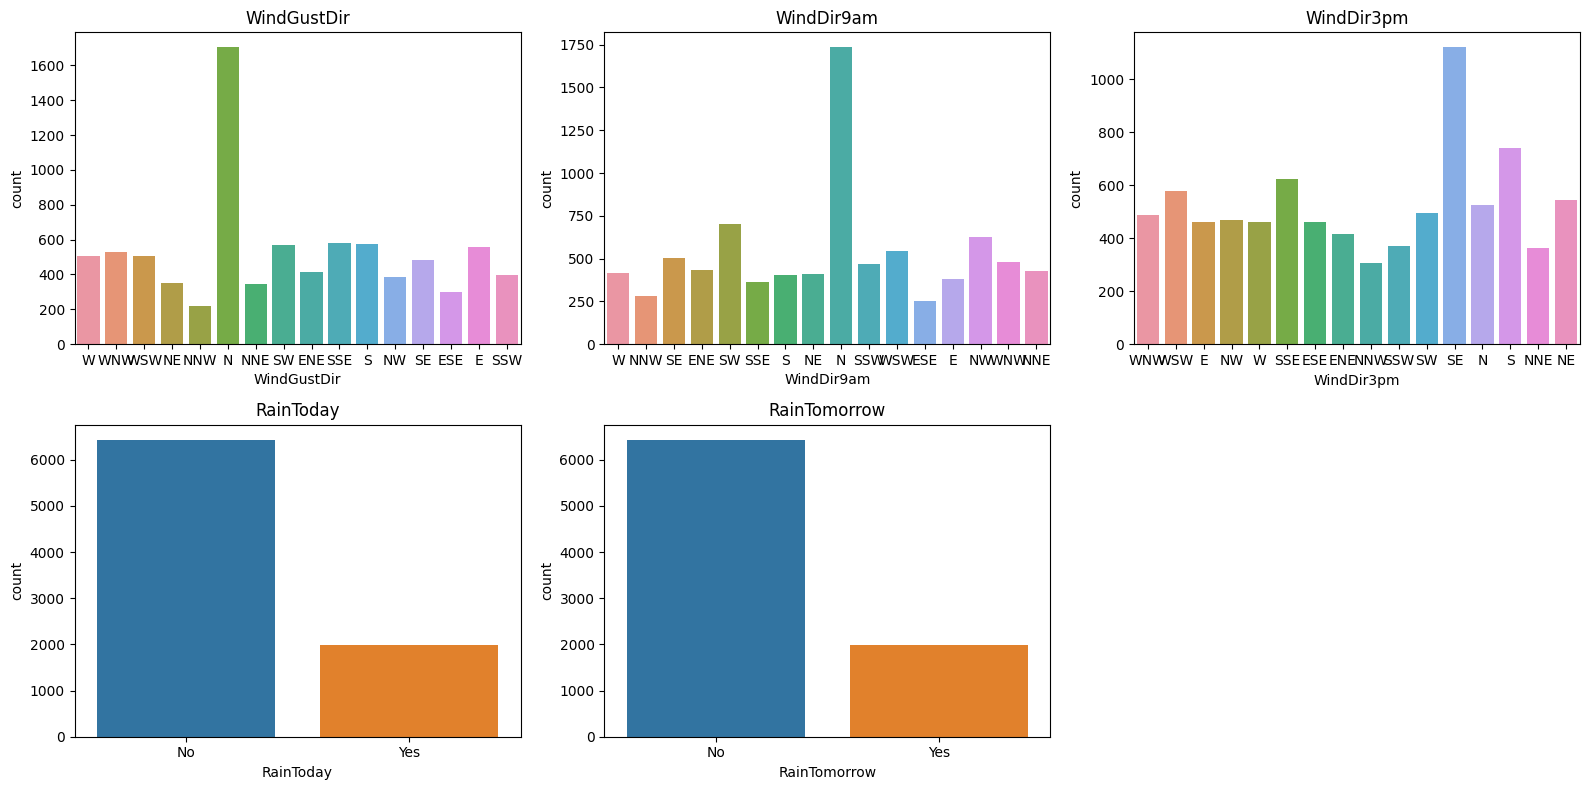

In [18]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sb.countplot(x = data[col], data=data)
    plt.title(col)
plt.tight_layout()
plt.show()

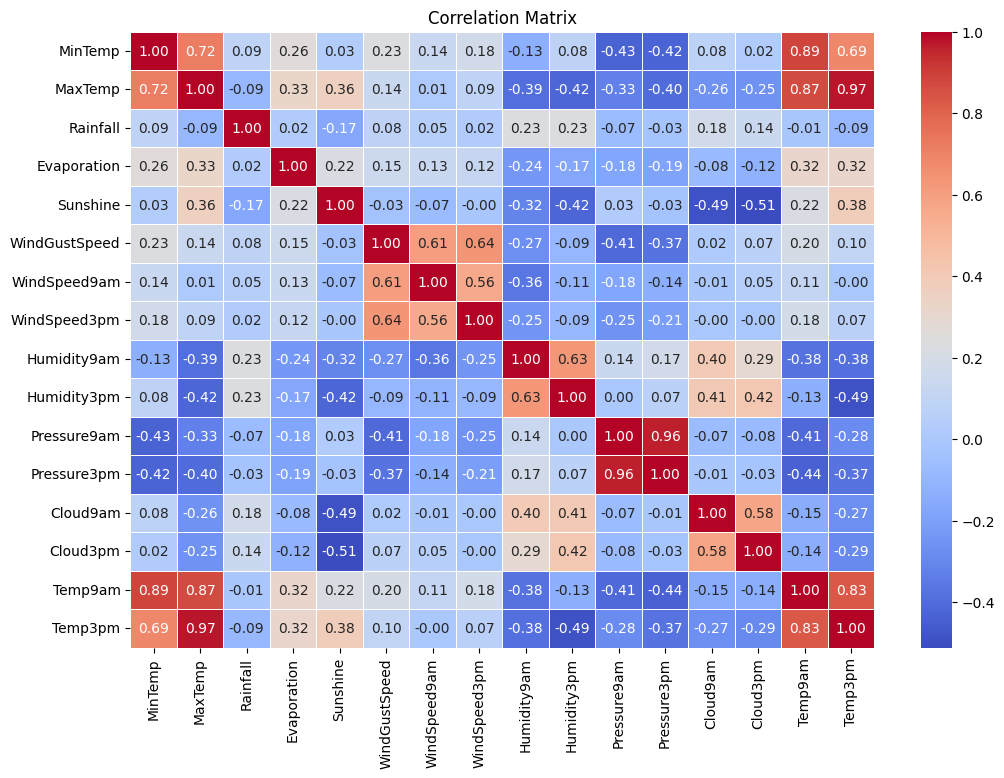

In [19]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

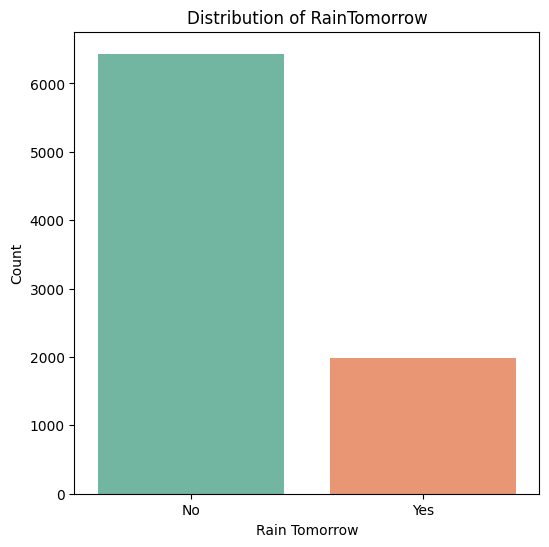

In [20]:
plt.figure(figsize=(6, 6))
sb.countplot(x='RainTomorrow', data=data, palette='Set2')
plt.title('Distribution of RainTomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()

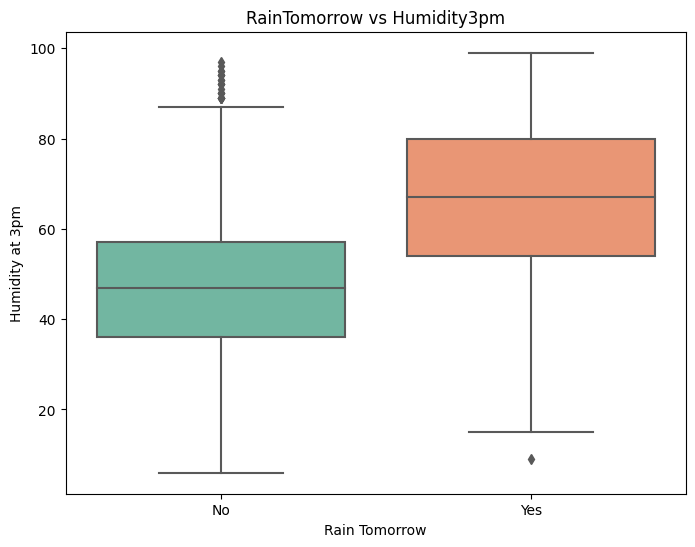

In [21]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='RainTomorrow', y='Humidity3pm', data=data, palette='Set2')
plt.title('RainTomorrow vs Humidity3pm')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Humidity at 3pm')
plt.show()

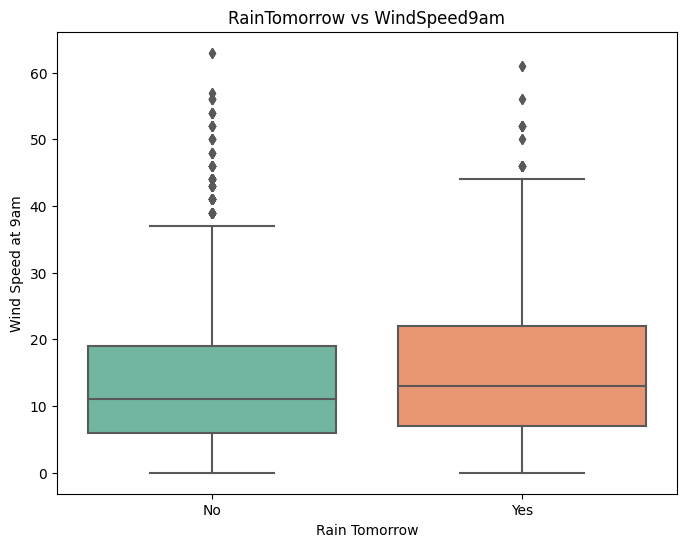

In [22]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='RainTomorrow', y='WindSpeed9am', data=data, palette='Set2')
plt.title('RainTomorrow vs WindSpeed9am')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Wind Speed at 9am')
plt.show()

Converting "Date" into year, month, day and day of the week

In [23]:
data["Date"] = pd.to_datetime(data["Date"])
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data["DayOfWeek"] = data["Date"].dt.dayofweek

Data Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ["Date","Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]
for j in categorical_columns:
    data[j] = label_encoder.fit_transform(data[j])

In [25]:
data.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0         1     13.4     22.9       0.6          4.6       8.7   
1     1         1      7.4     25.1       0.0          4.6       8.7   
2     2         1     12.9     25.7       0.0          4.6       8.7   
3     3         1      9.2     28.0       0.0          4.6       8.7   
4     4         1     17.5     32.3       1.0          4.6       8.7   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Cloud9am  Cloud3pm  Temp9am  \
0           13           44.0          13  ...       8.0       5.0     16.9   
1           14           44.0           6  ...       5.0       5.0     17.2   
2           15           46.0          13  ...       5.0       2.0     21.0   
3            4           24.0           9  ...       5.0       5.0     18.1   
4           13           41.0           1  ...       7.0       8.0     17.8   

   Temp3pm  RainToday  RainTomorrow  Year  Month  Day  DayOfWeek  
0     21.8          0            No  2008     12    1          0  
1     24.3          0            No  2008     12    2          1  
2     23.2          0            No  2008     12    3          2  
3     26.5          0            No  2008     12    4          3  
4     29.7          0            No  2008     12    5          4  

[5 rows x 27 columns]

#Model Building and Evaluation

a) Building the model to predict Rain Tomorrow

Importing necessary libraries and packages

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

Splitting the data into features and target variable

In [27]:
X = data.drop(["RainTomorrow","Date"], axis=1)
y = data["RainTomorrow"]

Scaling the data

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Splitting the data into train and test sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Building and Evaluation

In [30]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machines": SVC(probability=True, random_state=42)
}

for model_name, model in models.items():
    print(f"Model: {model_name}")

    # Model Training
    model.fit(X_train, y_train)

    # Prediction using test data
    y_pred = model.predict(X_test)

    # Calculating the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1: {f1:.4f}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")
    print("\n")

Model: Random Forest
Accuracy: 0.9193
Precision: 0.8904
Recall: 0.7224
F1: 0.7976
Cross-Validation Accuracy: 0.88 (±0.01)


Model: Gradient Boosting
Accuracy: 0.8688
Precision: 0.7820
Recall: 0.5606
F1: 0.6531
Cross-Validation Accuracy: 0.84 (±0.02)


Model: Logistic Regression
Accuracy: 0.8493
Precision: 0.7294
Recall: 0.5013
F1: 0.5942
Cross-Validation Accuracy: 0.83 (±0.01)


Model: Support Vector Machines
Accuracy: 0.8659
Precision: 0.8139
Recall: 0.5067
F1: 0.6246
Cross-Validation Accuracy: 0.84 (±0.01)




Model Selection:

Clearly, from the metrics above, Random Forest Classifier is performing the best. Hence, will be selecting it and performing Hyperparameter tuning on it.

Hyperparameter tuning

In [31]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_classifier = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

best_rf = random_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Accuracy: 0.9157270029673591


Plotting the metrics

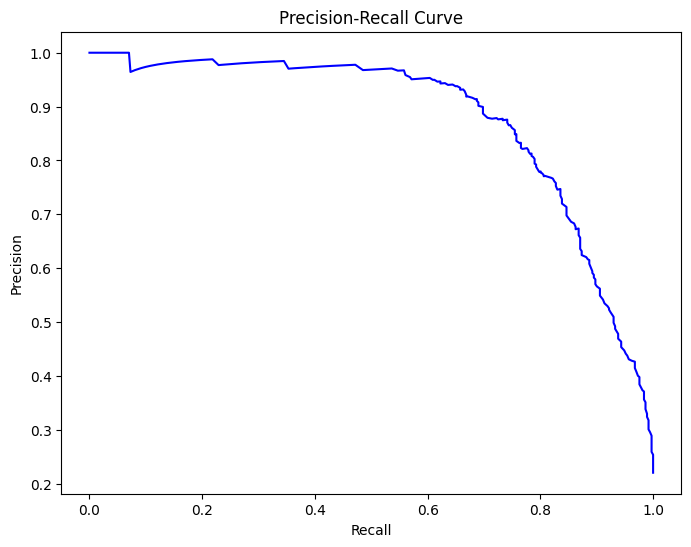

In [32]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_test_binary = (y_test == 'Yes').astype(int)
predicted_probs = best_rf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test_binary, predicted_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


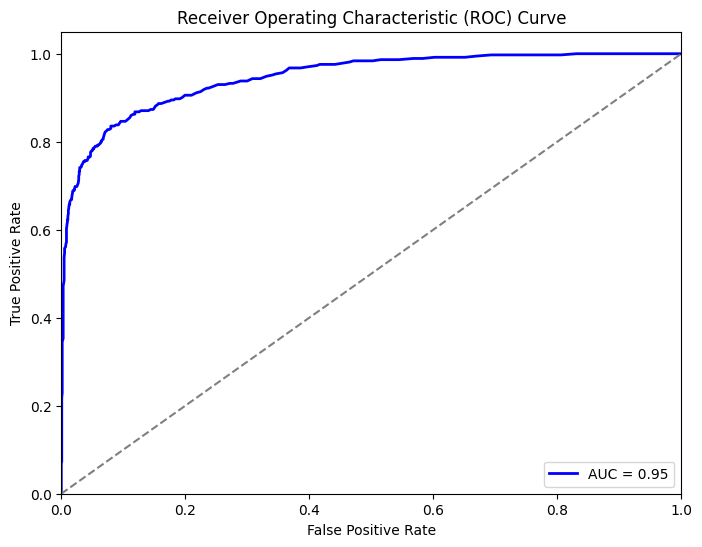

In [33]:
from sklearn.metrics import roc_curve, auc

y_test_binary = (y_test == 'Yes').astype(int)
predicted_probs = best_rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, predicted_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Loading the model and predicting the results

In [34]:
import joblib

model_filename = 'random_forest_model.pkl'
joblib.dump(best_rf, model_filename)

['random_forest_model.pkl']

In [35]:
loaded_model = joblib.load(model_filename)

In [36]:
new_data = pd.DataFrame({
    'Location': ['Albury', 'Sydney', 'Melbourne'],
    'MinTemp': [25.0, 20.5, 10.2],
    'MaxTemp': [35.0, 30.0, 22.3],
    'Rainfall': [1.2, 4.0, 3.5],
    'Evaporation': [8.0, 7.2, 4.8],
    'Sunshine': [8.0, 9.5, 2.0],
    'WindGustDir': ['W', 'W', 'SE'],
    'WindGustSpeed': [40, 60, 25],
    'WindDir9am': ['W', 'S', 'E'],
    'WindDir3pm': ['SW', 'SE', 'E'],
    'WindSpeed9am:':[9.0, 16.0, 8.0],
    'WindSpeed3pm':[2.0, 6.0, 1.0],
    'Humidity9am': [70, 30, 75],
    'Humidity3pm': [40, 50, 65],
    'Pressure9am': [1015.0, 1018.5, 1010.2],
    'Pressure3pm': [1012.0, 1016.0, 1008.8],
    'Cloud9am': [4.0, 1.0, 8.0],
    'Cloud3pm': [3.0, 2.0, 7.0],
    'Temp9am': [20.0, 25.0, 15.0],
    'Temp3pm': [23.0, 28.0, 20.0],
    'RainToday': ['No', 'No', 'Yes'],
    'Year': [2023, 2023, 2023],
    'Month': [8, 8, 8],
    'Day': [18, 18, 18],
    'DayOfWeek': [3, 3, 3]
})

Predictions

In [37]:
label_encoder = LabelEncoder()

cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in cat_cols:
    new_data[col] = label_encoder.fit_transform(new_data[col])

predictions = loaded_model.predict(new_data)

print(predictions)

['Yes' 'Yes' 'Yes']


b) Predicting the Rainfall using Regression Models

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

In [39]:
data.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0         1     13.4     22.9       0.6          4.6       8.7   
1     1         1      7.4     25.1       0.0          4.6       8.7   
2     2         1     12.9     25.7       0.0          4.6       8.7   
3     3         1      9.2     28.0       0.0          4.6       8.7   
4     4         1     17.5     32.3       1.0          4.6       8.7   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Cloud9am  Cloud3pm  Temp9am  \
0           13           44.0          13  ...       8.0       5.0     16.9   
1           14           44.0           6  ...       5.0       5.0     17.2   
2           15           46.0          13  ...       5.0       2.0     21.0   
3            4           24.0           9  ...       5.0       5.0     18.1   
4           13           41.0           1  ...       7.0       8.0     17.8   

   Temp3pm  RainToday  RainTomorrow  Year  Month  Day  DayOfWeek  
0     21.8          0            No  2008     12    1          0  
1     24.3          0            No  2008     12    2          1  
2     23.2          0            No  2008     12    3          2  
3     26.5          0            No  2008     12    4          3  
4     29.7          0            No  2008     12    5          4  

[5 rows x 27 columns]

In [40]:
data2 = data

In [41]:
data2.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day',
       'DayOfWeek'],
      dtype='object')

Splitting the data into features and target

In [42]:
cat_columns = ["Date","Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday","RainTomorrow"]
for i in cat_columns:
    data2[i] = label_encoder.fit_transform(data2[i])

In [43]:
X2 = data2.drop(['Rainfall','Date'], axis=1)
y2 = data2['Rainfall']

Splitting the data into train and test data

In [44]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

Building regression models and evaluating the metrics

In [45]:
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}


for name, model in models.items():
    model.fit(X_train2, y_train2)
    y_pred2 = model.predict(X_test2)

    predictions2 = model.predict(X_test2)
    mse = mean_squared_error(y_test2, y_pred2)
    mae = mean_absolute_error(y_test2, predictions2)
    rmse = mean_squared_error(y_test2, predictions2, squared=False)
    r2 = r2_score(y_test2, predictions2)

    print(f"Model: {name}")
    print(f"{name}: Mean Squared Error - {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-" * 40)


Model: Linear Regression
Linear Regression: Mean Squared Error - 95.1155
Mean Absolute Error (MAE): 3.0857
Root Mean Squared Error (RMSE): 9.7527
R-squared (R2): 0.2232
----------------------------------------
Model: Gradient Boosting
Gradient Boosting: Mean Squared Error - 79.3335
Mean Absolute Error (MAE): 2.1279
Root Mean Squared Error (RMSE): 8.9069
R-squared (R2): 0.3521
----------------------------------------
Model: Support Vector Regression
Support Vector Regression: Mean Squared Error - 128.4394
Mean Absolute Error (MAE): 2.6754
Root Mean Squared Error (RMSE): 11.3331
R-squared (R2): -0.0490
----------------------------------------
Model: Random Forest Regressor
Random Forest Regressor: Mean Squared Error - 72.4764
Mean Absolute Error (MAE): 1.8258
Root Mean Squared Error (RMSE): 8.5133
R-squared (R2): 0.4081
----------------------------------------


Based on the metrics, the model with the best performance in predicting rainfall amounts is the Random Forest Regressor. It has the lowest Mean Absolute Error (MAE), lowest Root Mean Squared Error (RMSE), and the highest R-squared (R2) value among the models.

Hyperparameter Tuning

In [46]:
param_dist2 = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

rf_regressor = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist2,
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)

random_search.fit(X_train2, y_train2)

print("Best parameters:", random_search.best_params_)
print("Best mean squared error:", -random_search.best_score_)

best_rf_regressor = random_search.best_estimator_

y_pred2 = best_rf_regressor.predict(X_test2)

# Calculate metrics
mse2 = mean_squared_error(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse)
r22 = r2_score(y_test2, y_pred2)

print("Best model metrics:")
print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print("Root Mean Squared Error:", rmse2)
print("R-squared (R2):", r22)

Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best mean squared error: 59.35704221921071
Best model metrics:
Mean Squared Error: 71.52122050999762
Mean Absolute Error: 1.8803855174614372
Root Mean Squared Error: 8.513306066377618
R-squared (R2): 0.41585867977612434


Plotting the metrics

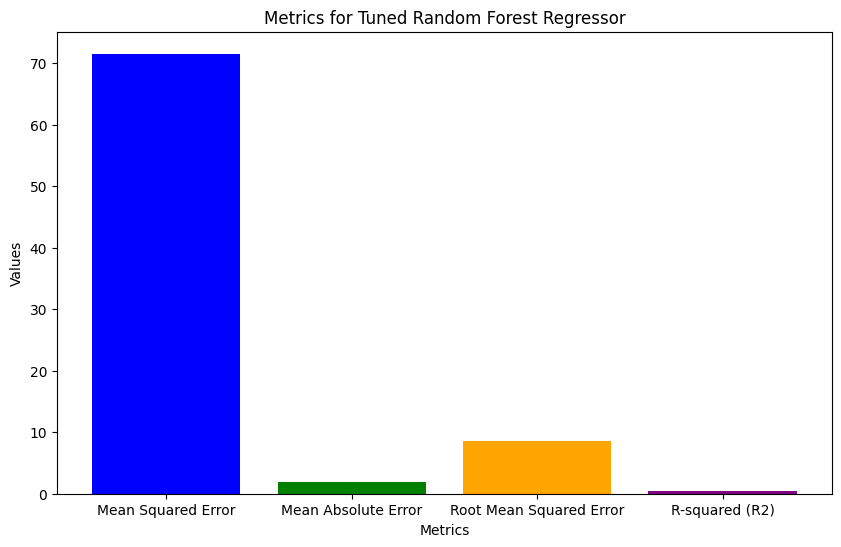

In [47]:
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R-squared (R2)']
values = [mse2, mae2, rmse2, r22]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Metrics for Tuned Random Forest Regressor')
plt.xticks(rotation=0)
plt.show()

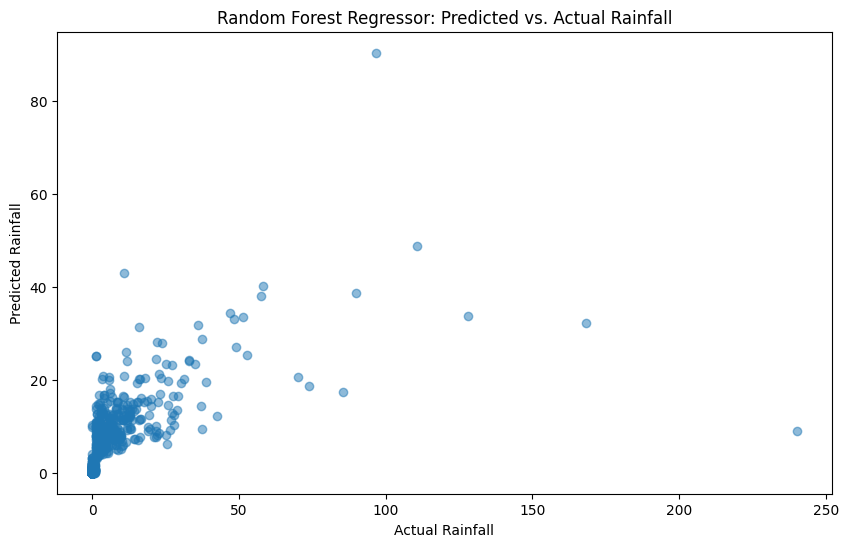

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred2, alpha=0.5)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Random Forest Regressor: Predicted vs. Actual Rainfall')
plt.show()

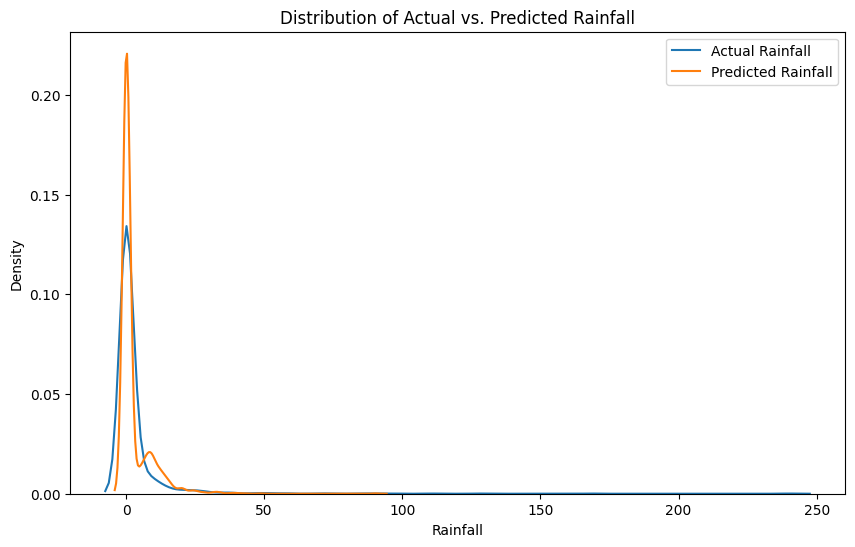

In [49]:
plt.figure(figsize=(10, 6))
sb.kdeplot(y_test2, label='Actual Rainfall')
sb.kdeplot(y_pred2, label='Predicted Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Rainfall')
plt.legend()
plt.show()

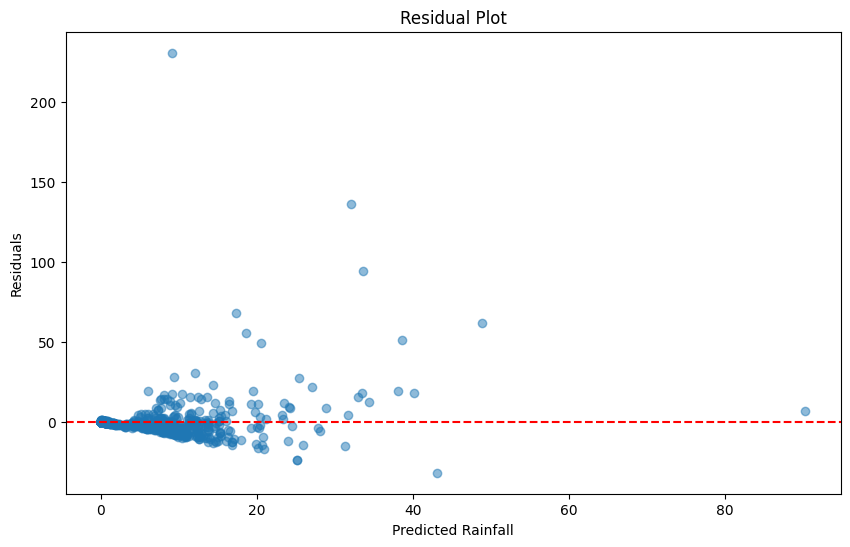

In [50]:
residuals = y_test2 - y_pred2
plt.figure(figsize=(10, 6))
plt.scatter(y_pred2, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Loading the regression model

In [51]:
model_filename2 = 'random_forest_model_regressor.pkl'
joblib.dump(best_rf_regressor, model_filename2)

['random_forest_model_regressor.pkl']

In [52]:
loaded_model2 = joblib.load(model_filename2)

In [53]:
new_data2 = pd.DataFrame({
    'Location': ['Albury', 'Sydney', 'Melbourne'],
    'MinTemp': [25.0, 20.5, 10.2],
    'MaxTemp': [35.0, 30.0, 22.3],
    'Evaporation': [8.0, 7.2, 4.8],
    'Sunshine': [8.0, 9.5, 2.0],
    'WindGustDir': ['W', 'SW', 'SE'],
    'WindGustSpeed': [40, 60, 25],
    'WindDir9am': ['NW', 'E', 'NE'],
    'WindDir3pm': ['NW', 'NE', 'W'],
    'WindSpeed9am':[9.0, 16.0, 8.0],
    'WindSpeed3pm':[2.0, 6.0, 1.0],
    'Humidity9am': [60, 30, 75],
    'Humidity3pm': [40, 50, 65],
    'Pressure9am': [1005.0, 918.5, 1010.2],
    'Pressure3pm': [1012.0, 1016.0, 1008.8],
    'Cloud9am': [1.0, 1.0, 8.0],
    'Cloud3pm': [2.0, 2.0, 7.0],
    'Temp9am': [28.0, 25.0, 15.0],
    'Temp3pm': [29.0, 28.0, 20.0],
    'RainToday': ['Yes', 'No', 'Yes'],
    'RainTomorrow':['No','No', 'Yes'],
    'Year': [2022, 2023, 2023],
    'Month': [8, 8, 6],
    'Day': [18, 18, 14],
    'DayOfWeek': [3, 1, 5]
})
new_data2

Location  MinTemp  MaxTemp  Evaporation  Sunshine WindGustDir  \
0     Albury     25.0     35.0          8.0       8.0           W   
1     Sydney     20.5     30.0          7.2       9.5          SW   
2  Melbourne     10.2     22.3          4.8       2.0          SE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Cloud9am  Cloud3pm  \
0             40         NW         NW           9.0  ...       1.0       2.0   
1             60          E         NE          16.0  ...       1.0       2.0   
2             25         NE          W           8.0  ...       8.0       7.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day DayOfWeek  
0     28.0     29.0        Yes            No  2022      8   18         3  
1     25.0     28.0         No            No  2023      8   18         1  
2     15.0     20.0        Yes           Yes  2023      6   14         5  

[3 rows x 25 columns]

Predictions

In [54]:
cat_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for col in cat_columns:
    new_data2[col] = label_encoder.fit_transform(new_data2[col])

predictions = loaded_model2.predict(new_data2)

print(predictions)

[ 9.12674802  4.663925   10.42750911]
